In [2]:
# Import libraries:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, skewtest

In [3]:
# Define data folder pathway:
data_path = os.path.join('..', 'data')

# Define dataset pathways:
users_path = os.path.join(data_path, 'users_ratings.csv')
rt_network_path = os.path.join(data_path, 'rt_network.csv')

# Read in users data:
users_df = pd.read_csv(users_path)

# Read in retweet data:
rt_df = pd.read_csv(rt_network_path)

In [4]:
# View first five rows of users data:
users_df.head()

,userid,orig_rating,orig_rated_count,orig_total_count,rtw_rating,rtw_rated_count,rtw_total_count
0,15109931,NaN,NaN,NaN,0.833333,6.0,6.0
1,239232758,-1.666667,6.0,6.0,NaN,NaN,0.0
2,26362590,NaN,NaN,0.0,1.416667,12.0,12.0
3,1079483490968702978,NaN,NaN,NaN,1.333333,3.0,3.0
4,1048326771807068161,-1.666667,3.0,3.0,-1.000000,41.0,41.0


In [5]:
# View first five rows of retweet data:
rt_df.head()

,userid,rt_userid,rt
0,57,15496005,1
1,57,15952856,1
2,57,17375057,1
3,57,19847765,1
4,57,84734907,1


In [6]:
# Number of unique users in dataset:
n_users = len(np.unique(users_df['userid']))

print(f'total users: {n_users}')

total users: 1865559


In [7]:
# Subset into liberal/conservative/moderate users:
users_libs = users_df[users_df['orig_rating'] < 0]
users_cons = users_df[users_df['orig_rating'] > 0]
users_mod = users_df[users_df['orig_rating'] == 0]

In [8]:
# Number of liberal/conservative/moderate users:
n_libs = len(np.unique(users_libs['userid']))
n_cons = len(np.unique(users_cons['userid']))
n_mods = len(np.unique(users_mod['userid']))

# Number of users without ratings:
n_na = users_df['orig_rating'].isna().sum().sum()

print(f'total liberal users: {n_libs}')
print(f'total conservative users: {n_cons}')
print(f'total moderate users: {n_mods}')
print(f'total with no political rating: {n_na}')

total liberal users: 274437
total conservative users: 147434
total moderate users: 61544
total with no political rating: 1382144


In [9]:
# Number of users with ratings:
n_ratings = n_libs + n_cons + n_mods

# Number of partisan users:
n_partisan_ratings = n_libs + n_cons

print(f'total users with ratings: {n_ratings}')
print(f'total partisan users: {n_partisan_ratings}')

total users with ratings: 483415
total partisan users: 421871


In [10]:
# Subset down to users with 5+ original tweets:
users_min_tweets = users_df[users_df['orig_total_count'] >= 5]

# View cons/libs with 5+ original tweets separately:
cons = users_min_tweets[users_min_tweets['orig_rating'] > 0]
libs = users_min_tweets[users_min_tweets['orig_rating'] < 0]

In [11]:
n_cons_above_min_tweets = len(np.unique(cons['userid']))
n_libs_above_min_tweets = len(np.unique(libs['userid']))

print(f'Total number of conservative users with 5+ original tweets: {n_cons_above_min_tweets}')
print(f'Total number of liberal users with 5+ original tweets: {n_libs_above_min_tweets}')

Total number of conservative users with 5+ original tweets: 28688
Total number of liberal users with 5+ original tweets: 48754


In [12]:
user_df = pd.DataFrame({'userid': np.unique(users_min_tweets['userid'].values)})

In [13]:
users_df = users_df[users_df['userid'].isin(users_min_tweets['userid'].values)]

In [14]:
users_df.isnull().sum()

userid                  0
orig_rating             0
orig_rated_count        0
orig_total_count        0
rtw_rating          23158
rtw_rated_count     23158
rtw_total_count      7220
dtype: int64

In [15]:
# Subset retweet network ID to contain only egos and peers that meet min tweet threshold:
cons_joined = rt_df[rt_df['userid'].isin(cons['userid']) \
                  & rt_df['rt_userid'].isin(cons['userid'])]

# Filter out users who retweeted self:
cons_joined = cons_joined[cons_joined['userid'] != cons_joined['rt_userid']]

In [16]:
# Subsetting retweet network ID to contain only egos and peers that meet min tweet threshold:
libs_joined = rt_df[rt_df['userid'].isin(libs['userid']) \
                  & rt_df['rt_userid'].isin(libs['userid'])]
#r_r = r_r.sample(frac=0.2)

libs_joined = libs_joined[libs_joined['userid'] != libs_joined['rt_userid']]

In [25]:
cons_joined_red = cons_joined[cons_joined['rt'] <= 10]
libs_joined_red = libs_joined[libs_joined['rt'] <= 10]

In [26]:
n_cons_final = len(np.unique(cons_joined['userid']))
n_libs_final = len(np.unique(libs_joined['userid']))

print(f'Final number of conservative users: {n_cons_final}')
print(f'Final number of liberal users: {n_libs_final}')

Final number of conservative users: 25776
Final number of liberal users: 41107


In [28]:
n_cons_final_red = len(np.unique(cons_joined_red['userid']))
n_libs_final_red = len(np.unique(libs_joined_red['userid']))

print(f'Final number of conservative users (reduced retweet threshold dataset): {n_cons_final_red}')
print(f'Final number of liberal users (reduced retweet threshold dataset): {n_libs_final_red}')

Final number of conservative users (reduced retweet threshold dataset): 25701
Final number of liberal users (reduced retweet threshold dataset): 41086


In [73]:
all_joined[all_joined['userid'] == 140073]

,userid,rt_userid,rt
15874,140073,6782762,1
15875,140073,11134252,1
15877,140073,14828860,1
15879,140073,15212187,1
15883,140073,16106584,4
...,...,...,...
16231,140073,1212806053907185664,2
16236,140073,1225101644184137728,2
16255,140073,1276321291012763648,1
16263,140073,1286817922296446976,1


In [18]:
print(f'Total number of ego-peer relationships among conservatives: {len(cons_joined)}')
print(f'Total number of ego-peer relationships among liberals: {len(libs_joined)}')

Total number of ego-peer relationships among conservatives: 1723179
Total number of ego-peer relationships among liberals: 2535764


In [31]:
print(f'Total number of ego-peer relationships among conservatives (reduced threshold data): {len(cons_joined_red)}')
print(f'Total number of ego-peer relationships among liberals (reduced threshold data): {len(libs_joined_red)}')

Total number of ego-peer relationships among conservatives (reduced threshold data): 1636070
Total number of ego-peer relationships among liberals (reduced threshold data): 2444472


In [19]:
n_rt_cons = np.sum(cons_joined['rt'])
n_rt_libs = np.sum(libs_joined['rt'])

print(f'Total number of retweets among conservatives: {n_rt_cons}')
print(f'Total number of retweets among liberals: {n_rt_libs}')

Total number of retweets among conservatives: 8682758
Total number of retweets among liberals: 7292209


In [54]:
all_joined = pd.concat([cons_joined, libs_joined], axis=0)

In [55]:
all_joined.shape

(4258943, 3)

In [56]:
all_joined.shape

(4258943, 3)

In [57]:
all_joined.shape

(4258943, 3)

In [58]:
all_joined.head()

,userid,rt_userid,rt
15874,140073,6782762,1
15875,140073,11134252,1
15877,140073,14828860,1
15879,140073,15212187,1
15883,140073,16106584,4


In [59]:
#all_joined.to_csv('../data/processed_rt_user_data.csv', index=False)

In [60]:
pct_agg_func = lambda x: np.round(100*(len(x) / len(all_joined)), 
                                            decimals=2)
threshold_df = (all_joined
                    .groupby('rt')
                    .agg(count=('userid', 'count'),
                         pct=('userid', pct_agg_func))
                    .iloc[:10])

In [61]:
threshold_df

,count,pct
rt,,
1,2850973,66.94
2,579019,13.60
3,245973,5.78
4,136270,3.20
5,86092,2.02
6,58964,1.38
7,43525,1.02
8,32935,0.77
9,26042,0.61


In [62]:
len(all_joined)

4258943

In [68]:
np.sum(threshold_df['count'])

4080542

In [69]:
len(cons_joined_red) + len(libs_joined_red)

4080542

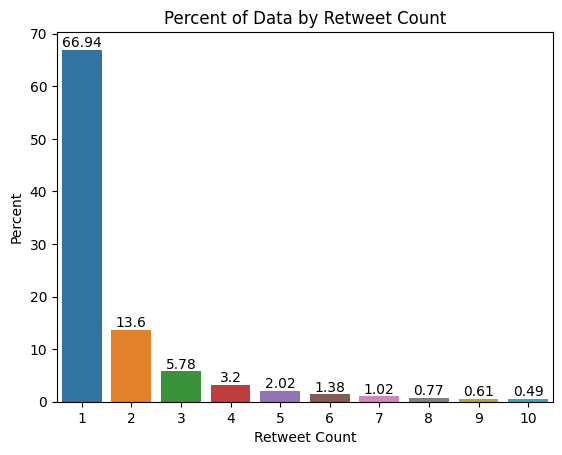

In [66]:
threshold_props = threshold_df['pct']
rt_vals = threshold_df.index.values

ax = sns.barplot(x=rt_vals, y=threshold_props)
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Percent of Data by Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Percent')
plt.savefig('../figures/percent_of_data_by_rt_count.png')
plt.show();

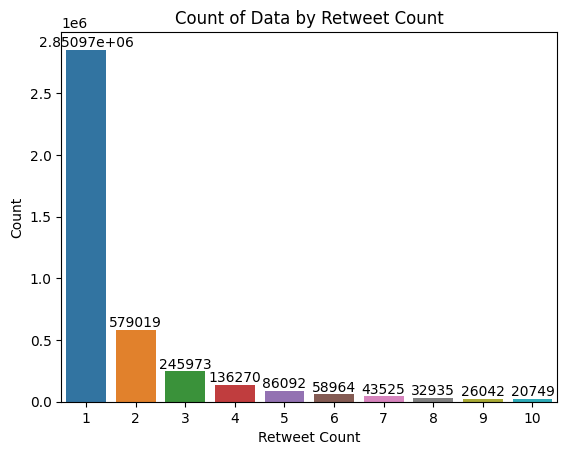

In [67]:
threshold_counts = threshold_df['count']
ax = sns.barplot(x=rt_vals, y=threshold_counts)
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Count of Data by Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Count')
plt.savefig('../figures/count_of_data_by_rt_count.png')
plt.show();

In [70]:
threshold_df.to_csv('../data/counts_pcts_by_retweet_count.csv')

In [1]:
# Define class TwitterDataProcessor:
class TwitterDataProcessor:
    """
    The TwitterDataProcessor class takes six parameters:

    1. poli_affil: the political affiliation ('left' or 'right') of users for which we wish to run the simulation
    2. frac_data: whether we wish to run the simulation on only a fraction of the data.
    3. frac_start: the starting percentage of users (in decimal form) if frac_data set to True
    4. frac_end: the ending percentage of users (in decimal form) if frac_data set to True
    5. users_file: The users ratings dataset CSV file path.
    6. rt_fle: The retweet network dataset CSV file path.

    There are three main functions:

    1. load_raw_data: This function loads the raw data for both the users ratings and retweet network datasets.
    2. preprocess_data: This function performs the following preprocessing steps for the data:
        - It subsets the users dataframe based on the chosen political affiliation on which to run the simulation.
        - It filters out both egos and peers with original tweet counts of less than 5 in both dataframes.
        - It filters out cases where egos retweeted themselves in the retweet dataframe.
        - It subsets down to the chosen fraction of users (if frac_data set to True) in the retweet dataframe.
    3. join_data: This function joins the users ratings dataset with the retweet dataset and suffixes to
    distinguish between ego and peer ratings.

    The main function get_retweet_data calls these functions in succession to create the final dataset.
    """

    def __init__(self, poli_affil, frac_data=False, frac_start=None, frac_end=None,
                 users_file=os.path.join('..', 'data', 'users_ratings.csv'), 
                 rt_file=os.path.join('..', 'data', 'rt_network.csv')):

        # Initialize political affiliation and data fraction attributes:
        self.poli_affil = poli_affil
        self.frac_data = frac_data
        self.frac_start = frac_start
        self.frac_end = frac_end

        # Initialize data files:
        self.users_file = users_file
        self.rt_file = rt_file

        # Initializing dataframes:
        self.users_df = pd.DataFrame()
        self.rt_df = pd.DataFrame()

    # Function to load raw data:
    def load_raw_data(self):

        print('Loading unprocessed user rating and retweet network datasets.', flush=True)

        # Load user ratings dataframe if file path exists:
        if os.path.exists(self.users_file):
            self.users_df = pd.read_csv(self.users_file)
            self.users_df = self.users_df.set_index('userid')
        else:
            return 'Users ratings file does not exist.'

        # Define retweet network dataframe if file path exists:
        if os.path.exists(self.rt_file):
            self.rt_df = pd.read_csv(self.rt_file)

        print('Datasets loaded. Processing and joining datasets.', flush=True)

    # Function to preprocess loaded raw data:
    def preprocess_data(self, min_tweets=5):

        # Subset to conservative ego ratings:
        if self.poli_affil == 'right':
            self.users_df = self.users_df[self.users_df['orig_rating'] > 0]

        # Subset to liberal ego ratings and convert ratings to positive scale:
        elif self.poli_affil == 'left':
            self.users_df = self.users_df[self.users_df['orig_rating'] < 0]
            self.users_df['orig_rating'] = self.users_df['orig_rating'] * -1

        # Subset based on min tweet threshold:
        self.users_df = self.users_df[self.users_df['orig_total_count'] >= min_tweets]

        # Subset retweet network ID to contain only egos and peers that meet min tweet threshold:
        userid_condition = self.rt_df['userid'].isin(self.users_df.index)
        rt_userid_condition = self.rt_df['rt_userid'].isin(self.users_df.index)
        self.rt_df = self.rt_df[userid_condition & rt_userid_condition]

        # Remove observations where user retweeted self
        self.rt_df = self.rt_df[self.rt_df['userid'] != self.rt_df['rt_userid']]

        # Subset fraction of users if needed to speed up simulation:
        if self.frac_data:

            # Get unique user ID values:
            all_users = np.unique(self.rt_df['userid'].values)

            # Subset to specified fraction of users:
            n_users_start = int(self.frac_start*len(all_users))
            n_users_end = int(len(all_users) * self.frac_end)
            users_fraction = all_users[n_users_start:n_users_end]

            # Return dataset with only user IDs in specified fraction:
            self.rt_df = self.rt_df[self.rt_df['userid'].isin(users_fraction)]

    # Function to join dataframes:
    def join_data(self):

        # Join on user ID and retweet user ID:
        self.rt_df = self.rt_df.join(self.users_df[['orig_rating']],
                                     on='userid').join(self.users_df[['orig_rating']],
                                                       on='rt_userid',
                                                       rsuffix='_peer')\
            .rename(columns={'orig_rating': 'orig_rating_ego'})

        print('Datasets joined. Data successfully loaded.', flush=True)

    # Main function that returns final dataframe:
    def get_retweet_data(self):
        self.load_raw_data()
        self.preprocess_data()
        self.join_data()

        return self.rt_df


NameError: name 'os' is not defined

In [3]:
rt_df_left = TwitterDataProcessor(poli_affil='left').get_retweet_data()

Loading unprocessed user rating and retweet network datasets.
Datasets loaded. Processing and joining datasets.
Datasets joined. Data successfully loaded.


In [7]:
rt_df_left['poli_affil'] = np.repeat('left', len(rt_df_left))

In [6]:
peer_ratings_left = rt_df_left['orig_rating_peer'].values
skewness_left = skewtest(peer_ratings_left)

In [9]:
skew(peer_ratings_left)

0.9347909632886446

In [7]:
skewness_left

SkewtestResult(statistic=520.2962758137397, pvalue=0.0)

/Users/davidbailey/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

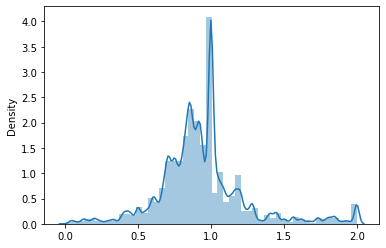

In [39]:
sns.distplot(peer_ratings_left)

In [4]:
rt_df_right = TwitterDataProcessor(poli_affil='right').get_retweet_data()

Loading unprocessed user rating and retweet network datasets.
Datasets loaded. Processing and joining datasets.
Datasets joined. Data successfully loaded.


In [8]:
rt_df_right['poli_affil'] = np.repeat('right', len(rt_df_right))

In [13]:
peer_ratings_right = rt_df_right['orig_rating_peer'].values
skewness_right = skewtest(peer_ratings_right)

In [14]:
skew(peer_ratings_right)

-0.23836555230365006

In [15]:
skewness_right

SkewtestResult(statistic=-125.99412016657624, pvalue=0.0)

/Users/davidbailey/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

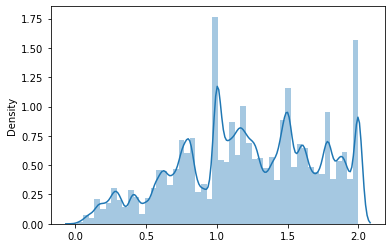

In [45]:
sns.distplot(peer_ratings_right)

In [9]:
rt_df_all = pd.concat([rt_df_left, rt_df_right], axis=0)
rt_df_all.to_csv('../data/rt_data_processed.csv', index=False)

In [10]:
rt_df_all.head()

,userid,rt_userid,rt,orig_rating_ego,orig_rating_peer,poli_affil
698,785,939091,14,0.8,0.916667,left
699,785,2199541,1,0.8,1.142857,left
702,785,15464697,1,0.8,0.200000,left
703,785,15907183,1,0.8,0.428571,left
704,785,16471280,1,0.8,0.428571,left
